In [2]:
from pylab import imshow, figure, plot, colorbar, show, hist
%matplotlib inline

In [11]:
import data
import datagen
import net
import scipy.ndimage.interpolation
import numpy as np
import pandas as pd

In [106]:
volume_model = net.model3d((64, 64, 64), do_features=True)
volume_model.load_weights('tmp2c.h5')

In [12]:
df = data.ndsb17_get_df_test_labels()

In [79]:
len(df[df["cancer"] == 0])

141

In [145]:
pid = df[df["cancer"] == 0].iloc[2]["id"]

In [146]:
image = data.ndsb17_get_image(pid)
segmented_image = data.ndsb17_get_segmented_image(pid)
image = datagen.preprocess(image)

image_2mm = scipy.ndimage.interpolation.zoom(image, (0.5, 0.5, 0.5), order=1)
segmented_image_2mm = scipy.ndimage.interpolation.zoom(segmented_image.astype(np.float32), (0.5, 0.5, 0.5), order=1)
segmented_image_2mm = (segmented_image_2mm > 0)

In [147]:
predicted_image = net.tiled_predict(volume_model, image_2mm)[:,:,:,1]

In [148]:
#predicted_image = net.softmax_activations(predicted_image)
predicted_image *= segmented_image_2mm

selem = np.ones((3,3,3), dtype=int)
labeled_array, num_features = scipy.ndimage.measurements.label( predicted_image > 2, structure=selem )
label_boxes = scipy.ndimage.measurements.find_objects(labeled_array)
label_sizes = scipy.ndimage.measurements.sum(np.ones(predicted_image.shape, dtype=int), labeled_array, index=range(num_features+1))
label_activities_sum = scipy.ndimage.measurements.sum(predicted_image, labeled_array, index=range(num_features+1))
label_activities_max = scipy.ndimage.measurements.maximum(predicted_image, labeled_array, index=range(num_features+1))

In [149]:
label_boxes = [None] + label_boxes

In [158]:
for idx in np.argsort(label_activities)[::-1][:5]:
    print(idx, label_boxes[idx], label_sizes[idx], label_activities_sum[idx])

1 (slice(160, 161, None), slice(102, 103, None), slice(81, 82, None)) 1.0 2.11335206032
0 None 5702397.0 -2610661.25111


In [151]:
label_boxes[1]

(slice(160, 161, None), slice(102, 103, None), slice(81, 82, None))

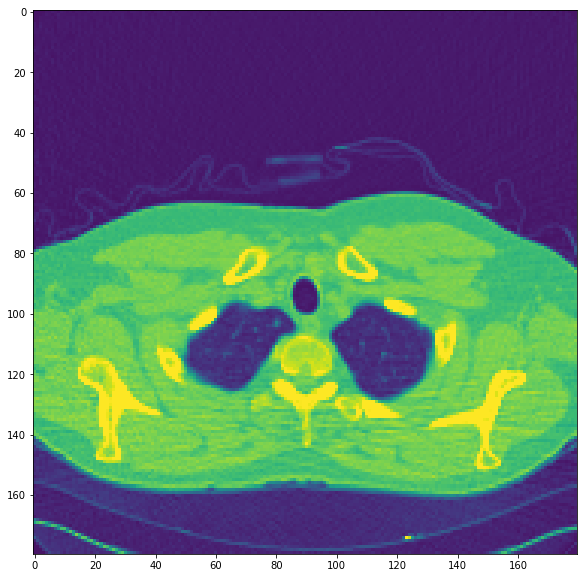

In [152]:
figure(figsize=(10,10))
imshow(image_2mm[160,:,:], vmin=datagen.preprocess(-1100), vmax=datagen.preprocess(350))

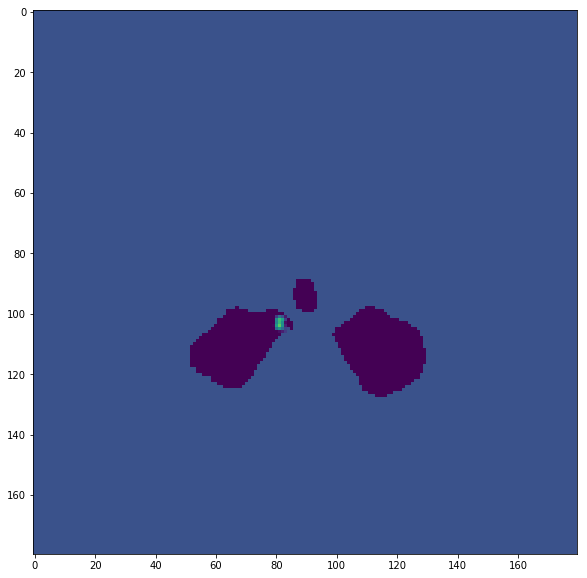

In [156]:
figure(figsize=(10,10))
imshow(predicted_image[161,:,:],vmin=-1, vmax=3)
# colorbar()

In [157]:
predicted_image[label_boxes[1]]

array([[[ 2.11335206]]], dtype=float32)

In [130]:
df["id"][0]

'026470d51482c93efc18b9803159c960'

In [159]:
df

,id,cancer
0,026470d51482c93efc18b9803159c960,1.0
1,031b7ec4fe96a3b035a8196264a8c8c3,1.0
2,03bd22ed5858039af223c04993e9eb22,0.0
3,06a90409e4fcea3e634748b967993531,0.0
4,07b1defcfae5873ee1f03c90255eb170,1.0
5,0b20184e0cd497028bdd155d9fb42dc9,0.0
6,12db1ea8336eafaf7f9e3eda2b4e4fef,0.0
7,159bc8821a2dc39a1e770cb3559e098d,0.0
8,174c5f7c33ca31443208ef873b9477e5,0.0
9,1753250dab5fc81bab8280df13309733,0.0
